**The Sparks Foundation #GRIPJUNE22**

**Author: Jhansi**


---


*Data Science and Business Analytics intern at Sparks Foundation*

**TASK-4 Exploratory Terrorism Data Analysis**

Sample Dataset: https://bit.ly/2TK5Xn5

In [3]:
#import the libraries required for supervised learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
data = pd.read_csv("/content/globalterrorismdb_0718dist.csv",encoding='ISO-8859-1')
data.head()

In [5]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [6]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

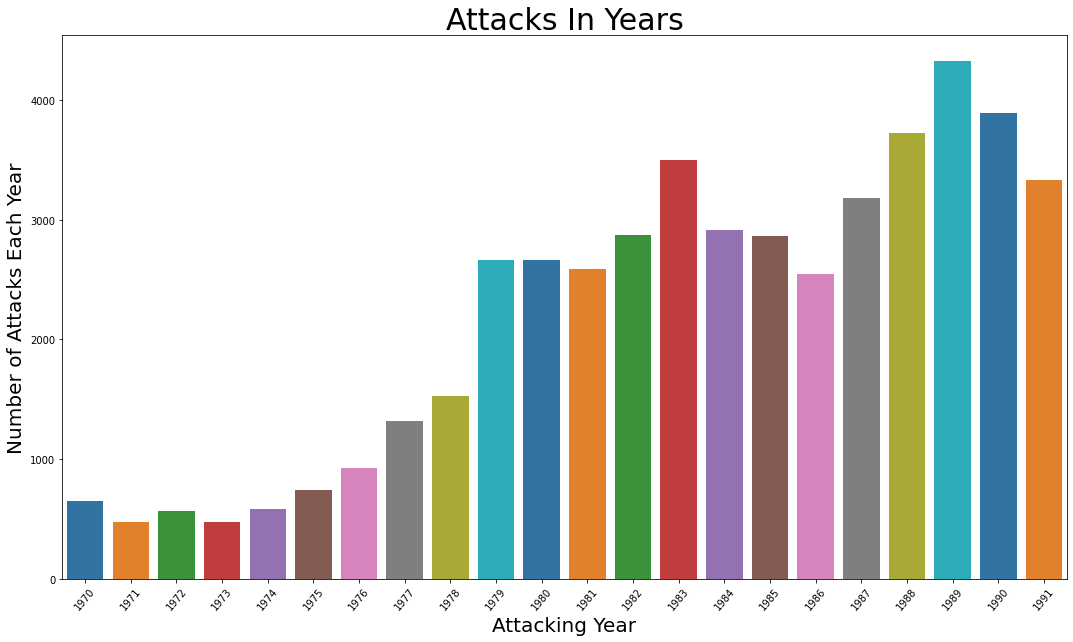

In [7]:
year = data['Year'].unique()
years_count = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = year,
           y = years_count,
           palette = "tab10")
plt.xticks(rotation = 50)
plt.xlabel('Attacking Year',fontsize=20)
plt.ylabel('Number of Attacks Each Year',fontsize=20)
plt.title('Attacks In Years',fontsize=30)
plt.show()

In [8]:
data['Wound'] = data['Wound'].fillna(0)
data['Wound'] = data['Wound'].fillna(0)
data['kill'] = data['kill'].fillna(0)


In [9]:
#handling missing values
data.isnull().sum()

eventid           0
Year              0
Month             0
day               0
approxdate    48263
              ...  
INT_LOG           1
INT_IDEO          1
INT_MISC          1
INT_ANY           1
related       43566
Length: 135, dtype: int64

In [10]:
data.duplicated().sum()

0

In [11]:
data.drop_duplicates()
data.head()

,eventid,Year,Month,day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [12]:
data.fillna(0)

,eventid,Year,Month,day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,0,0,0,58,Dominican Republic,2,...,0,0,0,0,PGIS,0.0,0.0,0.0,0.0,0
1,197000000002,1970,0,0,0,0,0,130,Mexico,1,...,0,0,0,0,PGIS,0.0,1.0,1.0,1.0,0
2,197001000001,1970,1,0,0,0,0,160,Philippines,5,...,0,0,0,0,PGIS,-9.0,-9.0,1.0,1.0,0
3,197001000002,1970,1,0,0,0,0,78,Greece,8,...,0,0,0,0,PGIS,-9.0,-9.0,1.0,1.0,0
4,197001000003,1970,1,0,0,0,0,101,Japan,4,...,0,0,0,0,PGIS,-9.0,-9.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48284,199109260051,1991,9,26,0,0,0,159,Peru,3,...,0,0,0,0,PGIS,0.0,0.0,0.0,0.0,"199109260051, 199109260022, 199109260023, 1991..."
48285,199109260052,1991,9,26,0,0,0,159,Peru,3,...,0,0,0,0,PGIS,0.0,0.0,0.0,0.0,"199109260052, 199109260022, 199109260023, 1991..."
48286,199109260053,1991,9,26,0,0,0,159,Peru,3,...,0,0,0,0,PGIS,0.0,0.0,0.0,0.0,"199109260053, 199109260022, 199109260023, 1991..."
48287,199109260054,1991,9,26,0,0,0,159,Peru,3,...,0,0,0,0,PGIS,0.0,0.0,0.0,0.0,"199109260054, 199109260022, 199109260023, 1991..."


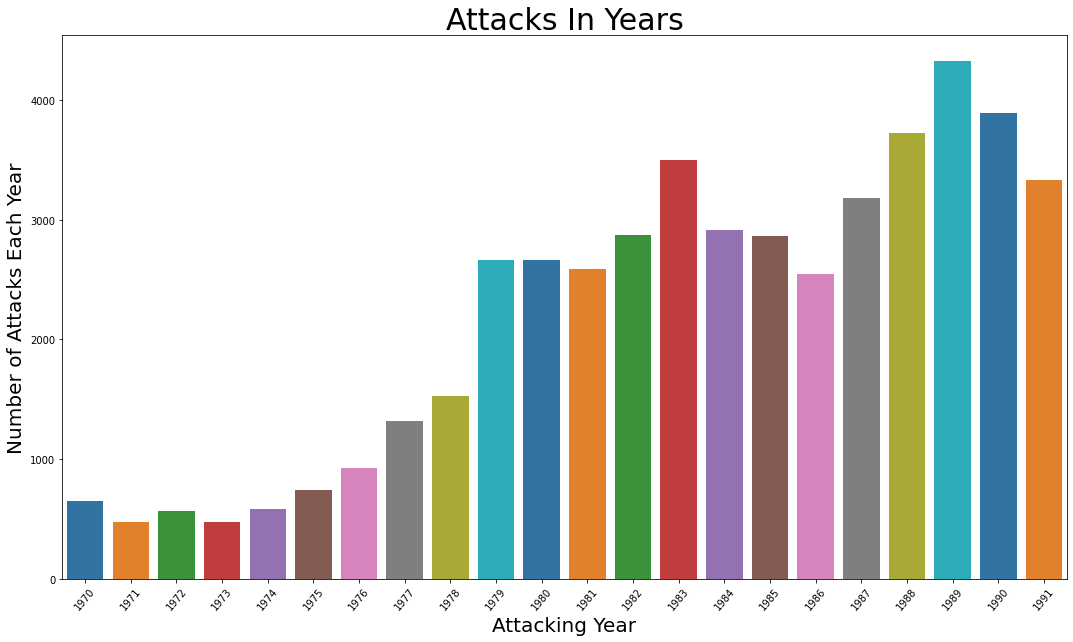

In [13]:
year = data['Year'].unique()
years_count = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = year,
           y = years_count,
           palette = "tab10")
plt.xticks(rotation = 50)
plt.xlabel('Attacking Year',fontsize=20)
plt.ylabel('Number of Attacks Each Year',fontsize=20)
plt.title('Attacks In Years',fontsize=30)
plt.show()